In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
def grouping() :
    matrix = df.pivot_table(index='Customer Last Name', columns='Offer #', values='n')
    matrix.fillna(0, inplace=True)
    matrix.reset_index(inplace=True)
    return matrix

def clustering(matrix) :
    cluster = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
    matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[1:]])
    return cluster

def princi_comp_anal(matrix) :
    pca = PCA(n_components=2, random_state=0)
    matrix['x'] = pca.fit_transform(matrix[matrix.columns[1:]])[:, 0]
    matrix['y'] = pca.fit_transform(matrix[matrix.columns[1:]])[:, 1]
    clusters = matrix.iloc[:, [0, 33, 34, 35]]
    return clusters

In [ ]:
# Loading the dataset_1 (OfferInformation)
offers = pd.read_excel("data.xlsx", sheet_name=0)
# Loading the dataset_2 (Transactions)
transactions = pd.read_excel("data.xlsx", sheet_name=1)
transactions['n'] = 1
# Merging the two datasets into df
df = pd.merge(left=offers, right=transactions, how='inner')
print(df.head())

   Offer # Campaign Varietal  ...  Past Peak  Customer Last Name  n
0        1  January   Malbec  ...      False              Thomas  1
1        1  January   Malbec  ...      False             Jackson  1
2        1  January   Malbec  ...      False            Mitchell  1
3        1  January   Malbec  ...      False            Peterson  1
4        1  January   Malbec  ...      False                Wood  1

[5 rows x 9 columns]


In [ ]:
# Creating an Offer-Transaction pivot table
matrix = grouping()
print(matrix.head())

# Using KMeans to cluster the data
cluster = clustering(matrix)
print(matrix.head())

Offer # Customer Last Name    1    2    3    4  ...   28   29   30   31   32
0                    Adams  0.0  0.0  0.0  0.0  ...  0.0  1.0  1.0  0.0  0.0
1                    Allen  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
2                 Anderson  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0
3                   Bailey  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0
4                    Baker  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0  0.0

[5 rows x 33 columns]
Offer # Customer Last Name    1    2    3    4  ...   29   30   31   32  cluster
0                    Adams  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0  0.0        1
1                    Allen  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0        0
2                 Anderson  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0        4
3                   Bailey  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0        1
4                    Baker  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0        2

[5 rows x 34 columns]


Offer # Customer Last Name  cluster         x         y
0                    Adams        1 -0.872239 -0.849723
1                    Allen        0 -1.648094  0.489293
2                 Anderson        4  2.470870 -0.333795
3                   Bailey        1 -0.804125 -0.555772
4                    Baker        2  0.272535 -0.006274
..                     ...      ...       ...       ...
95                Williams        2  0.287518  0.281932
96                  Wilson        1 -0.802578 -0.544706
97                    Wood        3  1.388371  0.442883
98                  Wright        2  0.306247  0.578292
99                   Young        3  1.287082  1.054514

[100 rows x 4 columns]


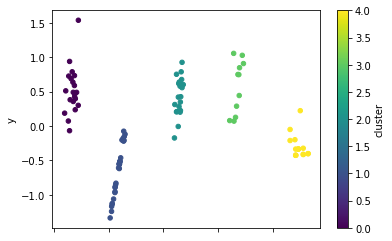

In [ ]:
# Visualizing clusters using PCA
clusters = princi_comp_anal(matrix)
print(clusters)
clusters.plot.scatter(x='x', y='y', c='cluster', colormap='viridis')
plt.show()

In [ ]:
# To find which cluster orders the most 'Champagne'
data = pd.merge(left=clusters, right=transactions, how='inner')
data = pd.merge(left=offers, right=data, how='inner')
champagne = {}
for i in range(0,5) :
    new_df = data
    counts = new_df['Varietal'].value_counts(ascending=False)
    if counts.index[0] == 'Champagne':
         champagne[i] = counts[0]
cluster_champagne = max(champagne, key=champagne.get)
print("The cluster that orders the most 'Champagne' is {}.".format(cluster_champagne))

# To find which cluster of customers favours discounts more on an average
discount = {}
for i in data.cluster.unique() :
    new_df = data[data.cluster == i]
    counts = (new_df['Discount (%)'].values.sum()) / len(new_df)
    discount[i] = counts
cluster_discount = max(discount)
print("The cluster of customers which favour discounts more on an average is {}.".format(cluster_discount))

The cluster that orders the most 'Champagne' is 0.
The cluster of customers which favour discounts more on an average is 4.
